# Baysean Gaussian Classifier

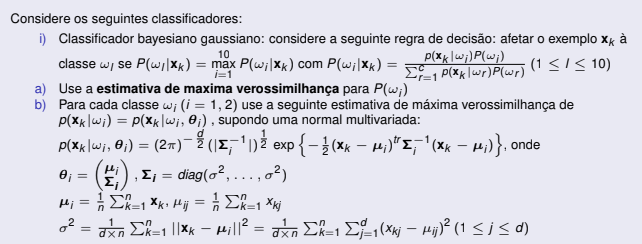

In [1]:
import numpy as np
import csv
import pandas as pd

from collections import Counter
from numpy import linalg as LA

In [2]:
with open("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.data") as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split()
      newLines.append(newLine)

with open("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.csv", 'w') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows(newLines)

In [3]:
# reading csv files
data =  pd.read_csv("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.csv",
                    names=["sequence_name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "protein_local"])
print(data)

     sequence_name   mcg   gvh   alm   mit  erl  pox   vac   nuc protein_local
0       ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22           MIT
1       ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22           MIT
2       ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22           MIT
3       AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22           NUC
4       AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22           MIT
...            ...   ...   ...   ...   ...  ...  ...   ...   ...           ...
1479    YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22           ME2
1480    ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47           NUC
1481    ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22           ME2
1482    ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39           NUC
1483    G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22           CYT

[1484 rows x 10 columns]


In [4]:
X = data.iloc[:, 1:9].values
y = data.iloc[:, 9].values

In [5]:
def probability_priori(y):
  """return a list with each priori probability"""

  pr_pb = Counter(y)

  total = sum(pr_pb.values(), 0.0)

  for key in pr_pb:
    pr_pb[key] /= total  

  return pr_pb

probability_priori(y)

#lst = [0.3119946091644205, 0.0033692722371967657,0.02358490566037736, 0.029649595687331536,0.03436657681940701,0.10983827493261455
#       ,0.16442048517520216,0.2890835579514825,0.013477088948787063,0.02021563342318059]
#sum(lst)

Counter({'CYT': 0.3119946091644205,
         'ERL': 0.0033692722371967657,
         'EXC': 0.02358490566037736,
         'ME1': 0.029649595687331536,
         'ME2': 0.03436657681940701,
         'ME3': 0.10983827493261455,
         'MIT': 0.16442048517520216,
         'NUC': 0.2890835579514825,
         'POX': 0.013477088948787063,
         'VAC': 0.02021563342318059})

In [6]:
def mi(X,y):

  y = np.expand_dims(y, axis=1)

  concat = np.hstack((X,y))

  ids=np.unique(concat[:,-1]) #array of unique ids

  pos_mean=[(i, np.mean(concat[concat[:,-1]==i, 0:-1], axis=0)) for i in ids]

  return pos_mean,concat

mi(X,y)

([('CYT', array([0.4807127429805615, 0.46950323974082064, 0.5354211663066957,
          0.22710583153347716, 0.5043196544276458, 0.0010799136069114472,
          0.4993952483801294, 0.2572354211663062], dtype=object)),
  ('ERL',
   array([0.792, 0.772, 0.48200000000000004, 0.33599999999999997, 1.0, 0.0,
          0.546, 0.246], dtype=object)),
  ('EXC', array([0.7354285714285713, 0.716857142857143, 0.49257142857142855,
          0.2920000000000001, 0.5, 0.0, 0.45571428571428574,
          0.22657142857142848], dtype=object)),
  ('ME1', array([0.7886363636363637, 0.7565909090909091, 0.37613636363636355,
          0.31181818181818177, 0.5, 0.0, 0.5129545454545454,
          0.26818181818181824], dtype=object)),
  ('ME2', array([0.7215686274509805, 0.6031372549019609, 0.41490196078431374,
          0.2825490196078431, 0.5098039215686274, 0.0, 0.5101960784313726,
          0.24549019607843153], dtype=object)),
  ('ME3', array([0.4308588957055214, 0.4895092024539876, 0.3642944785276073,
   

In [7]:
def sigma_square(X,y):

  mean_vector,concat = mi(X,y)
  classes = np.unique(y)
  
  mean_vector = dict(mean_vector)

  sigma_square_val = []

  for i in classes:
    mean = mean_vector[i]

    input_values = concat[concat[:,-1]==i, 0:-1]

    sub = input_values - mean

    d = len(sub[0])
    n = len(sub)

    sigma_square_val.append([i,LA.norm(sub)**2/(d*n)])

  return sigma_square_val

sigma_square(X,y)

[['CYT', 0.006644540488596673],
 ['ERL', 0.0037799999999999995],
 ['EXC', 0.004503918367346939],
 ['ME1', 0.005051065340909087],
 ['ME2', 0.008936457131872345],
 ['ME3', 0.005372243027588556],
 ['MIT', 0.007969023993886099],
 ['NUC', 0.00795776864937692],
 ['POX', 0.02528553125],
 ['VAC', 0.007299208333333333]]

In [8]:
def sigma_matrix(X,y):
  """docstring"""

  lst = sigma_square(X,y)

  sigma_matrix_val = []

  for n,i in enumerate(lst):

    lst[n][1]

    diag = np.zeros((8, 8), float)
    np.fill_diagonal(diag, lst[n][1])

    sigma_matrix_val.append(diag)

  return np.array(sigma_matrix_val)

sigma_matrix(X,y)

array([[[0.00664454, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.00664454, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00664454, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00664454, 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00664454,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00664454, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.00664454, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00664454]],

       [[0.00378   , 0.        , 0.        , 0.        , 0.        ,
         

In [9]:
def probability_posteriori(class_name,classes,x,mean,sigma_matrix_values):

  d = sigma_matrix_values.shape[1]

  i = classes.index(class_name)

  posteriori = (1/(((2*np.pi)**(d/2))*np.sqrt(np.linalg.det(sigma_matrix_values[i]))))*np.exp(-0.5*(np.matmul(np.matmul(((x - mean).transpose()),(np.linalg.inv(sigma_matrix_values[i]))),x - mean)))

  return posteriori

x = np.array([0.58, 0.61, 0.47, 0.13, 0.5, 0.0, 0.48, 0.22]) 
mean_vector,concat = mi(X,y)
matrix = sigma_matrix(X,y)
classes = [mean_vector[n][0] for n,i in enumerate(mean_vector)]
mean_vector = dict(mean_vector)
class_name = 'CYT'
mean = mean_vector[class_name]

probability_posteriori(class_name,classes,x,mean,matrix)

11063.161630612884

In [10]:
def baysean_classifier(x_i,X,y):

  pp = probability_priori(y)
  mean_vector,concat = mi(X,y)
  matrix = sigma_matrix(X,y)
  classes = [mean_vector[n][0] for n,i in enumerate(mean_vector)]
  mean_vector = dict(mean_vector)

  classification_bg = []

  for x in x_i:

    probs = []

    for n,i in enumerate(classes):
      den = 0
      mean = mean_vector[i]
      for k,j in enumerate(classes):
        mean_den = mean_vector[j]
        den += pp[classes[k]]*probability_posteriori(j,classes,x,mean_den,matrix)

      num = pp[classes[n]]*probability_posteriori(i,classes,x,mean,matrix)
      probs.append(num/den)

    classification_bg.append(classes[probs.index(max(probs))])

  return classification_bg

##### training accuracy

In [11]:
#x = np.array([0.58, 0.61, 0.47, 0.13, 0.5, 0.0, 0.48, 0.22])
%%time
train_predict = baysean_classifier(X[0:],X,y)

CPU times: user 13.3 s, sys: 11.1 s, total: 24.4 s
Wall time: 12.6 s


In [12]:
x = train_predict
y_train = data.iloc[:, 9].values

sum([1 for n,i in enumerate(y_train) if x[n] == i])/len(x)

0.5680592991913747

### item a)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

accuracy = []
precision = []
recall = []
f_measure = []

skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X,y):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  baysean_predict = baysean_classifier(X_test,X_train,y_train)

  accuracy.append(accuracy_score(y_test, baysean_predict))
  precision.append(precision_score(y_test, baysean_predict, average='macro',zero_division=0))
  recall.append(recall_score(y_test, baysean_predict, average='macro',zero_division=0))
  f_measure.append(f1_score(y_test, baysean_predict, average='macro',zero_division=0))

  print("accuracy: ",accuracy_score(y_test, baysean_predict))

print("\nMean accuracy: ",sum(accuracy)/len(accuracy), "Std: ",np.std(accuracy))
print("Mean precision: ",sum(precision)/len(precision), "Std: ",np.std(precision))
print("Mean recall: ",sum(recall)/len(recall), "Std: ",np.std(recall))
print("Mean f_measure: ",sum(f_measure)/len(f_measure), "Std: ",np.std(f_measure))

accuracy:  0.5757575757575758
accuracy:  0.5824915824915825
accuracy:  0.5555555555555556
accuracy:  0.5016835016835017
accuracy:  0.5709459459459459

Mean accuracy:  0.5572868322868323 Std:  0.029181318943810583
Mean precision:  0.5187985821378526 Std:  0.04691612877972742
Mean recall:  0.5412367435664127 Std:  0.055097343930489484
Mean f_measure:  0.513396318680765 Std:  0.051176011688749724


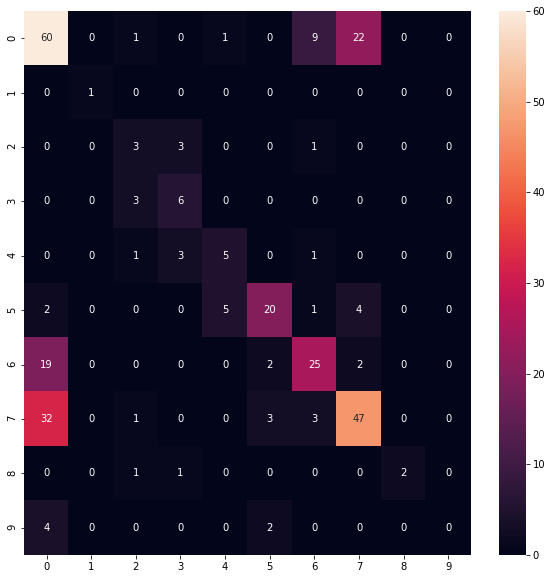

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

cf_matrix = confusion_matrix(y_test, baysean_predict)

import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

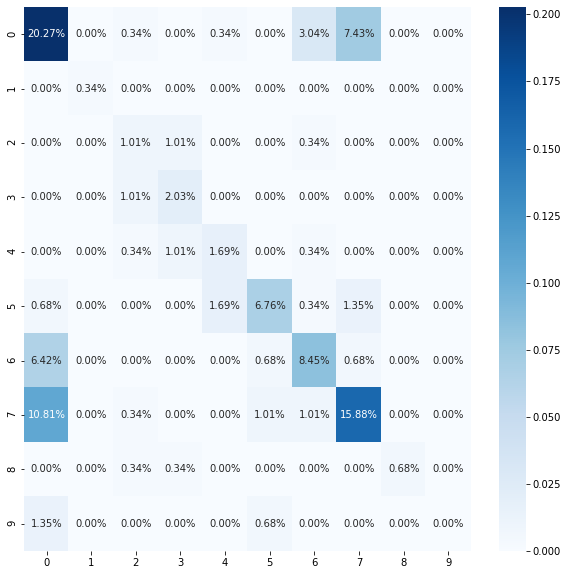

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [20]:
print(classification_report(y_test,baysean_predict))

              precision    recall  f1-score   support

         CYT       0.51      0.65      0.57        93
         ERL       1.00      1.00      1.00         1
         EXC       0.30      0.43      0.35         7
         ME1       0.46      0.67      0.55         9
         ME2       0.45      0.50      0.48        10
         ME3       0.74      0.62      0.68        32
         MIT       0.62      0.52      0.57        48
         NUC       0.63      0.55      0.58        86
         POX       1.00      0.50      0.67         4
         VAC       0.00      0.00      0.00         6

    accuracy                           0.57       296
   macro avg       0.57      0.54      0.54       296
weighted avg       0.58      0.57      0.57       296



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
